## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Preprocessing and Analysis

In [2]:
# Load the dataset
mail_dataset = pd.read_csv("./Datasets/mail_data.csv")
mail_dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Shape of the dataset
mail_dataset.shape

(5572, 2)

In [4]:
# replace the null values with a null string
mail_data = mail_dataset.where((pd.notnull(mail_dataset)),"")
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Check the missing values
mail_data.isna().sum()

Category    0
Message     0
dtype: int64

In [6]:
mail_data["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

## Imbalance Data Handling

In [7]:
spam = mail_data[mail_data["Category"]=="spam"]
spam.shape

(747, 2)

In [8]:
ham = mail_data[mail_data["Category"]=="ham"].sample(747)
ham.shape

(747, 2)

In [9]:
# concatenate to new dataset
mail_data = pd.concat((spam, ham), axis=0)
mail_data.shape

(1494, 2)

## Target Feature Split

In [10]:
x = mail_data["Message"]
y = mail_data["Category"]

## Label Encoding

In [11]:
encoder = LabelEncoder()

encoded_y = encoder.fit_transform(y)
encoded_y                                      # ham = 0  /  spam = 1

y = encoded_y

## Train Test Split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

## Feature Extraction

In [13]:
# Transform the text data to feature vectors that can be used as input to the logistic regression model

feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)    # min_df=1 give value for one word only onetime, cant repeat

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

# convert y_train, y_test values as integers
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [14]:
print(x_train_features)

  (0, 108)	0.3744736130421883
  (0, 1139)	0.18577316623434237
  (0, 2584)	0.2881308333737042
  (0, 2190)	0.25302403104824484
  (0, 3231)	0.2837238455106456
  (0, 1616)	0.3539374501615643
  (0, 1876)	0.24456300734013048
  (0, 1067)	0.20945620501467113
  (0, 256)	0.2356544248173756
  (0, 2893)	0.24861704318518626
  (0, 3066)	0.2631876826300216
  (0, 3234)	0.318830647836105
  (0, 3768)	0.2837238455106456
  (1, 431)	0.3235480371750644
  (1, 1369)	0.3235480371750644
  (1, 2395)	0.15368843988489325
  (1, 1653)	0.13609567873624578
  (1, 702)	0.3235480371750644
  (1, 3521)	0.3235480371750644
  (1, 895)	0.3235480371750644
  (1, 691)	0.2932154941378714
  (1, 3084)	0.18633689946155582
  (1, 2557)	0.26288295110067833
  (1, 3065)	0.3235480371750644
  (1, 3744)	0.2531180533076258
  :	:
  (1192, 1719)	0.19364060990618231
  (1192, 554)	0.18753688851016026
  (1192, 3249)	0.21074191895731342
  (1192, 3779)	0.16296522821537388
  (1192, 3495)	0.15267132236132264
  (1192, 3618)	0.11045144592504559
  (1192,

In [15]:
print(x_test_features)

  (0, 3837)	0.2891231539605164
  (0, 3801)	0.29787017553982037
  (0, 3709)	0.38713149698642185
  (0, 3485)	0.22648696510220645
  (0, 2671)	0.218589815662123
  (0, 2059)	0.18335416224488774
  (0, 2012)	0.35083802138409603
  (0, 1885)	0.27507673968441504
  (0, 1854)	0.26157669993749444
  (0, 1752)	0.23295944341680835
  (0, 1374)	0.33915413192659827
  (0, 845)	0.3296076991358972
  (1, 3499)	0.4355271713126361
  (1, 2692)	0.42179897392998045
  (1, 2194)	0.37281192774771926
  (1, 2130)	0.42835063671114154
  (1, 1986)	0.5567124097756564
  (2, 3791)	0.2383152835733872
  (2, 2316)	0.43574238619277444
  (2, 1273)	0.43574238619277444
  (2, 1219)	0.25224689186099264
  (2, 838)	0.3817406537138937
  (2, 814)	0.31319018531043663
  (2, 477)	0.25773318998437805
  (2, 370)	0.3254274425900175
  :	:
  (296, 2399)	0.24126855868763558
  (296, 2239)	0.22803737163835083
  (296, 2237)	0.29389918722571945
  (296, 2208)	0.22803737163835083
  (296, 2042)	0.22803737163835083
  (296, 1831)	0.19603083137016472
  (2

## Train The Model

In [16]:
model = LogisticRegression()

In [17]:
# Training the model with training data
model.fit(x_train_features, y_train)

LogisticRegression()

## Evaluate The Model

In [18]:
# Prediction on training data
y_pred_train = model.predict(x_train_features)
accuracy = accuracy_score(y_train, y_pred_train)

print("Accuracy on training data: ", accuracy)

Accuracy on training data:  0.9874476987447699


In [19]:
# Prediction on testing data
y_pred_test = model.predict(x_test_features)
accuracy = accuracy_score(y_test, y_pred_test)

print("Accuracy on testing data: ", accuracy)

Accuracy on testing data:  0.9498327759197325


In [20]:
confusion_matrix(y_test, y_pred_test)

array([[148,   2],
       [ 13, 136]], dtype=int64)

<Axes: >

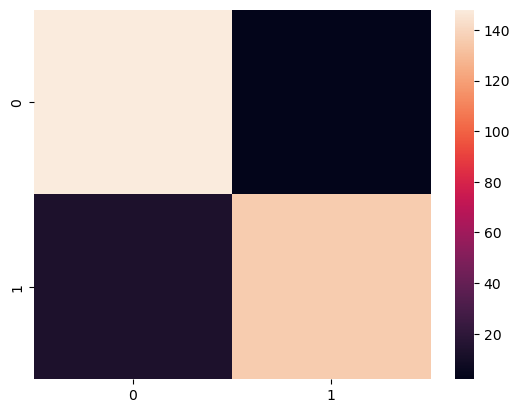

In [21]:
sns.heatmap(data=confusion_matrix(y_test, y_pred_test))

## Building A Predictive System

In [22]:
input_mail = ["Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"]

# Convert text to feature vectors
vector_input_mail = feature_extraction.transform(input_mail)

# Making predictions
prediction = model.predict(vector_input_mail)

if prediction==0:
    print("Not Spam Mail")
else:
    print("Spam Mail")

Spam Mail
